In [ ]:
# Elaborado por:
# Ana Mantilla : anagmd2019@gmail.com
# Paul Goyes: goyes.yesid@gmail.com
# Manuel Daza: manedaza12@gmail.com

In [1]:
!git clone https://github.com/Anagabrielamantilla/ProgramacionCientifica.git

Cloning into 'ProgramacionCientifica'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 45 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (45/45), 5.02 MiB | 2.18 MiB/s, done.


In [2]:
# Insert the directory
import sys
sys.path.append('/content/ProgramacionCientifica/Isotermas')

In [3]:
from funciones import prom_temp
from funciones import regresion
from funciones import DEM
from funciones import Isotermas
from funciones import MapaIsotermas
from funciones import m
from funciones import b

**Importar las librerías**

* Pandas : usada para manipular datos en columnas
* Matplotlib: usada para la visualización de los datos en gráficas 2D
* Sklearn: usada para hacer regresión lineal
* Numpy: usada para operar con vectores y matrices


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# **Cargar y filtrar los datos**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Primero se lee/carga el registro de datos de temperatura máxima y temperatura mínima

df_max = pd.read_csv('/content/drive/MyDrive/REPOSITORIO_GITHUB/ISOTERMAS/tmax.csv') # Estos datos deben descargarse del repositorio
df_min = pd.read_csv('/content/drive/MyDrive/REPOSITORIO_GITHUB/ISOTERMAS/tmin.csv') # Estos datos deben descargarse del repositorio

In [ ]:
df_max

In [7]:
# Se agrupan los datos por el promedio de la temperatura en cada estación

df_max = df_max.groupby(['CodigoEstacion']).mean()
df_min = df_min.groupby(['CodigoEstacion']).mean()

# **Regresión lineal**

La ecuación de la regresión lineal relaciona los valores de altura del DEM con los valores de Temperatura Media Anual. Con esta ecuación se pueden calcular las isotermas de toda la zona de estudio. Basta con reemplazar los valores X por los del DEM

In [8]:
promedio = prom_temp(df_max['Valor'], df_min['Valor'])

In [ ]:
help(prom_temp)

In [9]:
# El ejercicio se aplicará en tres municipios. Se escogieron tres estaciones para cada uno

est_lebrija = promedio[promedio.CodigoEstacion.isin([23195040, 23195502, 24065030])]
est_surata = promedio[promedio.CodigoEstacion.isin([23195200, 23195090, 37015020])]
est_puertoparra= promedio[promedio.CodigoEstacion.isin([23125050, 23125040, 23145020])]

In [10]:
# Se asignan los valores de altitud a cada estación en cada municipio

est_lebrija = est_lebrija.assign(Altitud=[118.0, 1189.0, 400])
est_surata = est_surata.assign(Altitud=[1850.0, 1725.0, 3214.0])
est_puertoparra = est_puertoparra.assign(Altitud=[180.0, 168.0, 805.0])

La pendiente es de [-0.00265035]y la intersección de 26.017138761494557


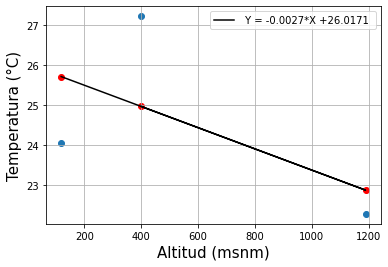

In [11]:
regresion_pp = regresion(est_lebrija['Altitud'],est_lebrija['Valor'])

In [ ]:
help(regresion)

In [12]:
m = m(est_lebrija['Altitud'],est_lebrija['Valor']) 
b = b(est_lebrija['Altitud'],est_lebrija['Valor'])

# **Cargar el DEM** 

In [13]:
from osgeo import gdal

raster  = gdal.Open('/content/ProgramacionCientifica/Isotermas/puertoparradem.tif') 
# raster = gdal.Open('/content/ProgramacionCientifica/Isotermas/lebrijadem.tif')
# raster  = gdal.Open('/content/ProgramacionCientifica/Isotermas/suratadem.tif') 


In [14]:
driver = raster.GetDriver
col = raster.RasterXSize
rows  = raster.RasterYSize
nelem = col*rows

print('El numero de filas es de: ', rows)
print('El numero de columnas es de: ', col,'\n')

El numero de filas es de:  3347
El numero de columnas es de:  3221 



In [15]:
Nonvalue = raster.GetRasterBand(1).GetNoDataValue() #Extraer los valores nulos
Array = raster.GetRasterBand(1).ReadAsArray().flatten().astype(np.float64) #Valores del DEM

# se organizan los datos y se eliminan las posiciones de NonData
NanValues = np.where(Array == Nonvalue)[0] # Extraer las posiciones de los valores nulos
cP      = np.arange(0, nelem) #Número de píxeles
cPP       = np.delete(cP, NanValues, axis=0) #Eliminar la posición de valores nulos
XX = np.delete(Array, NanValues, axis=0) #DEM sin los valores nulos

In [16]:
Nonvalue

-9999.0

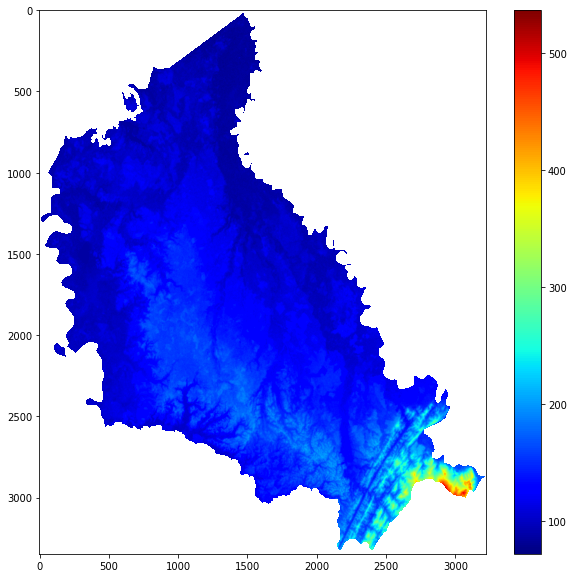

In [17]:
DEM(raster)

# **Calcular las isotermas**

In [18]:
Isotermas =  Isotermas(m, XX, b)

In [19]:
Isotermas

array([25.78125769, 25.79185909, 25.78920874, ..., 25.32274729,
       25.32539764, 25.32274729])

# **Exportar el mapa de isotermas**

In [20]:
fn = '/content/sample_data/' # Esta es la carpeta donde se guardará el mapa de isotermas
nombre = 'Puerto Parra'

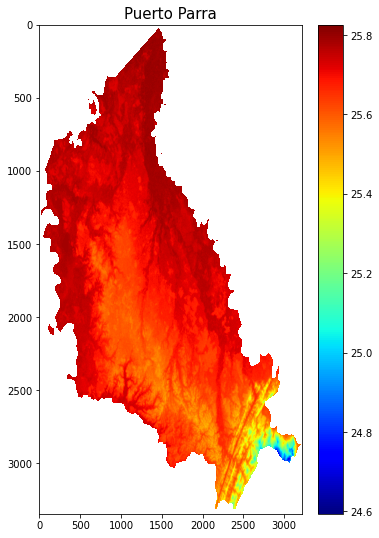

In [21]:
MapaIsotermas(raster = raster, Isotermas=Isotermas, fn=fn, nombre=nombre)

In [ ]:
help(MapaIsotermas)